<a href="https://colab.research.google.com/github/layaart/Mydata/blob/main/artt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
json_file_path = r"C:\Users\PoyaSystem\Downloads\best-artworks-of-all-time-metadata.json"
if os.path.exists(json_file_path):
    # Open and read the JSON file
    with open(json_file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Print the parsed JSON data
    print(json.dumps(data, indent=4))  # Pretty print the JSON data
else:
    print(f"The file {json_file_path} does not exist.")

The file C:\Users\PoyaSystem\Downloads\best-artworks-of-all-time-metadata.json does not exist.


In [ ]:
from google.colab import files
files.upload()


Saving best-artworks-of-all-time-metadata.json to best-artworks-of-all-time-metadata.json


{'best-artworks-of-all-time-metadata.json': b'{"@context":{"@language":"en","@vocab":"https://schema.org/","citeAs":"cr:citeAs","column":"cr:column","conformsTo":"dct:conformsTo","cr":"http://mlcommons.org/croissant/","data":{"@id":"cr:data","@type":"@json"},"dataBiases":"cr:dataBiases","dataCollection":"cr:dataCollection","dataType":{"@id":"cr:dataType","@type":"@vocab"},"dct":"http://purl.org/dc/terms/","extract":"cr:extract","field":"cr:field","fileProperty":"cr:fileProperty","fileObject":"cr:fileObject","fileSet":"cr:fileSet","format":"cr:format","includes":"cr:includes","isEnumeration":"cr:isEnumeration","jsonPath":"cr:jsonPath","key":"cr:key","md5":"cr:md5","parentField":"cr:parentField","path":"cr:path","personalSensitiveInformation":"cr:personalSensitiveInformation","recordSet":"cr:recordSet","references":"cr:references","regex":"cr:regex","repeated":"cr:repeated","replace":"cr:replace","sc":"https://schema.org/","separator":"cr:separator","source":"cr:source","subField":"cr:su

In [ ]:
json_path = '/content/best-artworks-of-all-time-metadata.json'

In [ ]:
with open(json_path, 'r') as f:
    data = json.load(f)

In [ ]:
# Display some basic information about the dataset
print(f"Dataset Name: {data['name']}")
print(f"Description: {data['description']}")
print(f"Total Keywords: {len(data['keywords'])}")

Dataset Name: Best Artworks of All Time
Description: ### Context

After being challenged many times by my girlfriend about who is the best to guess the painter, I decided to use the power of machine learning to defeat her.
I gathered a collection of artworks of the 50 most influential artists of all time. I added a dataset with basic information retrieved from wikipedia. I planned to create a convolutional neural network to recognise the artists looking the colors  used and the geometric patterns inside the pictures.

### Content

This dataset contains three files:

- **artists.csv**: dataset of information for each artist
- **images.zip**: collection of images (full size), divided in folders and sequentially numbered
- **resized.zip**: same collection but images have been resized and extracted from folder structure

Use *resized.zip* allows you to download less data and process faster your model. 

### Acknowledgements

The data was scraped from [artchallenge.ru][1] during the end of 

In [ ]:
import os

# Directory path (assuming the JSON file is in the root directory /content)
directory_path = '/content/'

# List contents of the directory
print(os.listdir(directory_path))

['.config', 'best-artworks-of-all-time-metadata.json', 'sample_data']


In [ ]:
artists = pd.read_csv('/content/artists.csv')
artists.shape

(50, 8)

In [ ]:
# Sort artists by number of paintings
artists = artists.sort_values(by=['paintings'], ascending=False)

# Create a dataframe with artists having more than 200 paintings
artists_top = artists[artists['paintings'] >= 200].reset_index()
artists_top = artists_top[['name', 'paintings']]
#artists_top['class_weight'] = max(artists_top.paintings)/artists_top.paintings
artists_top['class_weight'] = artists_top.paintings.sum() / (artists_top.shape[0] * artists_top.paintings)
artists_top

name  paintings  class_weight
0        Vincent van Gogh        877      0.445631
1             Edgar Degas        702      0.556721
2           Pablo Picasso        439      0.890246
3   Pierre-Auguste Renoir        336      1.163149
4          Albrecht Durer        328      1.191519
5            Paul Gauguin        311      1.256650
6          Francisco Goya        291      1.343018
7               Rembrandt        262      1.491672
8           Alfred Sisley        259      1.508951
9                  Titian        255      1.532620
10           Marc Chagall        239      1.635223

In [ ]:
# Set class weights - assign higher weights to underrepresented classes
class_weights = artists_top['class_weight'].to_dict()
class_weights

{0: 0.44563076604125634,
 1: 0.5567210567210568,
 2: 0.8902464278318493,
 3: 1.1631493506493507,
 4: 1.1915188470066518,
 5: 1.2566501023092662,
 6: 1.3430178069353327,
 7: 1.491672449687717,
 8: 1.5089505089505089,
 9: 1.532620320855615,
 10: 1.6352225180677062}

In [ ]:
updated_name = "Albrecht_Dürer".replace("_", " ")
artists_top.iloc[4, 0] = updated_name

In [ ]:
import json

# Path to the JSON file
json_file_path = '/content/best-artworks-of-all-time-metadata.json'

# Load the JSON file
with open(json_file_path, 'r') as f:
    data = json.load(f)

# Print the structure of the JSON file
import pprint
pprint.pprint(data)

{'@context': {'@language': 'en',
              '@vocab': 'https://schema.org/',
              'citeAs': 'cr:citeAs',
              'column': 'cr:column',
              'conformsTo': 'dct:conformsTo',
              'cr': 'http://mlcommons.org/croissant/',
              'data': {'@id': 'cr:data', '@type': '@json'},
              'dataBiases': 'cr:dataBiases',
              'dataCollection': 'cr:dataCollection',
              'dataType': {'@id': 'cr:dataType', '@type': '@vocab'},
              'dct': 'http://purl.org/dc/terms/',
              'extract': 'cr:extract',
              'field': 'cr:field',
              'fileObject': 'cr:fileObject',
              'fileProperty': 'cr:fileProperty',
              'fileSet': 'cr:fileSet',
              'format': 'cr:format',
              'includes': 'cr:includes',
              'isEnumeration': 'cr:isEnumeration',
              'jsonPath': 'cr:jsonPath',
              'key': 'cr:key',
              'md5': 'cr:md5',
              'parentField': 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil

In [ ]:
# Path to your file in Google Drive
drive_file_path = '/content/drive/My Drive/images.zip'


In [ ]:
colab_destination_path = '/content/images.zip'


In [ ]:
# Copy the file from Drive to Colab
shutil.copy(drive_file_path, colab_destination_path)

'/content/images.zip'

In [ ]:
# Verify the copy by listing the files in the /content directory
print("Contents of /content:", os.listdir('/content'))

Contents of /content: ['.config', 'best-artworks-of-all-time-metadata.json', 'drive', 'images.zip', 'artists.csv', 'sample_data']


In [ ]:
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the zip file
colab_zip_path = '/content/images.zip'

# Directory where the images will be extracted
extract_dir = '/content/images/images'
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(colab_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the extraction
print("Extracted files:", os.listdir(extract_dir)[:10])  # Print the first 10 files

# Display the images
image_files = [f for f in os.listdir(extract_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
for image_file in image_files[:5]:  # Adjust the range as needed
    img_path = os.path.join(extract_dir, image_file)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Extracted files: ['images']


In [ ]:
# There is some problem recognizing 'Albrecht_Dürer' (don't know why, worth exploring)
# So I'll update this string as directory name to df's
updated_name = "Albrecht_Durer".replace("_", " ")
artists_top.iloc[4, 0] = updated_name

Normalized directories in images_dir: ['Paul_Cezanne', 'Edouard_Manet', 'Henri_de_Toulouse-Lautrec', 'Henri_Matisse', 'Pierre-Auguste_Renoir', 'Andy_Warhol', 'Rembrandt', 'Raphael', 'Peter_Paul_Rubens', 'Titian', 'Kazimir_Malevich', 'Joan_Miro', 'Albrecht_Durer', 'Caravaggio', 'Marc_Chagall', 'El_Greco', 'Piet_Mondrian', 'Edvard_Munch', 'Paul_Klee', 'Frida_Kahlo', 'Alfred_Sisley', 'Michelangelo', 'Mikhail_Vrubel', 'Claude_Monet', 'Gustave_Courbet', 'Andrei_Rublev', 'Paul_Gauguin', 'Jackson_Pollock', 'Camille_Pissarro', 'Leonardo_da_Vinci', 'Vasiliy_Kandinskiy', 'Diego_Velazquez', 'Henri_Rousseau', 'Pieter_Bruegel', 'Giotto_di_Bondone', 'Vincent_van_Gogh', 'Sandro_Botticelli', 'Eugene_Delacroix', 'Amedeo_Modigliani', 'William_Turner', 'Jan_van_Eyck', 'Georges_Seurat', 'Pablo_Picasso', 'Gustav_Klimt', 'Edgar_Degas', 'Francisco_Goya', 'Hieronymus_Bosch', 'Diego_Rivera', 'Salvador_Dali', 'Rene_Magritte', 'images']


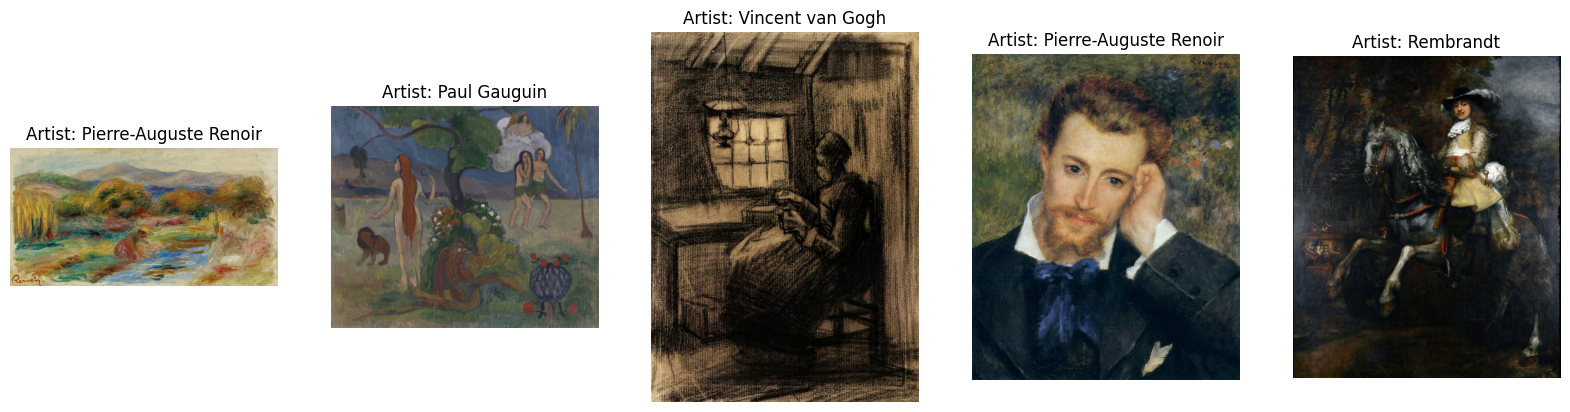

In [ ]:
# nemidunam

import os
import pandas as pd
from text_unidecode import unidecode
import matplotlib.pyplot as plt
import random

# Example DataFrame, replace with your actual DataFrame
data = {
    'name': [
        'Vincent van Gogh', 'Edgar Degas', 'Pablo Picasso', 'Pierre-Auguste Renoir',
        'Albrecht Dürer', 'Paul Gauguin', 'Francisco Goya', 'Rembrandt',
        'Alfred Sisley', 'Titian', 'Marc Chagall'
    ]
}
artists_top = pd.DataFrame(data)

# Update the name for "Albrecht Dürer"
updated_name = "Albrecht_Dürer".replace("_", " ")  # Update with specific encoding
artists_top.iloc[4, 0] = updated_name

# Directory containing artist images
images_dir ="/content/images/images/images"

# List and normalize all directories in the images directory
directories = os.listdir(images_dir)
normalized_directories = [unidecode(d).replace(' ', '_') for d in directories]
print("Normalized directories in images_dir:", normalized_directories)

# Replace spaces and handle special characters in artist names
artists_top_name = artists_top['name'].str.replace(' ', '_').values
normalized_artists_top_name = [unidecode(name) for name in artists_top_name]

# Manually handle the specific case for "Albrecht Dürer"
normalized_artists_top_name = [name.replace('ü', 'u') for name in normalized_artists_top_name]

# Specific mapping for the problematic case
specific_mappings = {
    'Albrecht_Durer': 'Albrecht_Durer'
}

# Create a mapping from artist names to directories
artist_dir_mapping = {name: specific_mappings.get(name, name) for name in normalized_artists_top_name}

# Print few random paintings
n = 5
fig, axes = plt.subplots(1, n, figsize=(20,10))

for i in range(n):
    random_artist = random.choice(list(artist_dir_mapping.keys()))
    artist_dir = artist_dir_mapping[random_artist]
    random_image = random.choice(os.listdir(os.path.join(images_dir, artist_dir)))
    random_image_file = os.path.join(images_dir, artist_dir, random_image)
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title("Artist: " + random_artist.replace('_', ' '))
    axes[i].axis('off')

plt.show()


In [ ]:

import pkg_resources
installed_packages = pkg_resources.working_set
packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])
print(packages_list)

['absl-py==1.4.0', 'aiohttp==3.9.5', 'aiosignal==1.3.1', 'alabaster==0.7.16', 'albumentations==1.3.1', 'altair==4.2.2', 'annotated-types==0.7.0', 'anyio==3.7.1', 'argon2-cffi-bindings==21.2.0', 'argon2-cffi==23.1.0', 'array-record==0.5.1', 'arviz==0.15.1', 'astropy==5.3.4', 'astunparse==1.6.3', 'async-timeout==4.0.3', 'atpublic==4.1.0', 'attrs==23.2.0', 'audioread==3.0.1', 'autograd==1.6.2', 'babel==2.15.0', 'backcall==0.2.0', 'beautifulsoup4==4.12.3', 'bidict==0.23.1', 'bigframes==1.6.0', 'bleach==6.1.0', 'blinker==1.4', 'blis==0.7.11', 'blosc2==2.0.0', 'bokeh==3.3.4', 'bqplot==0.12.43', 'branca==0.7.2', 'build==1.2.1', 'cachecontrol==0.14.0', 'cachetools==5.3.3', 'catalogue==2.0.10', 'certifi==2024.2.2', 'cffi==1.16.0', 'chardet==5.2.0', 'charset-normalizer==3.3.2', 'chex==0.1.86', 'click-plugins==1.1.1', 'click==8.1.7', 'cligj==0.7.2', 'cloudpathlib==0.16.0', 'cloudpickle==2.2.1', 'cmake==3.27.9', 'cmdstanpy==1.2.2', 'colorcet==3.1.0', 'colorlover==0.3.0', 'colour==0.1.5', 'communit

In [ ]:
installed_packages = pkg_resources.working_set
packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])
print(packages_list)

['absl-py==1.4.0', 'aiohttp==3.9.5', 'aiosignal==1.3.1', 'alabaster==0.7.16', 'albumentations==1.3.1', 'altair==4.2.2', 'annotated-types==0.7.0', 'anyio==3.7.1', 'argon2-cffi-bindings==21.2.0', 'argon2-cffi==23.1.0', 'array-record==0.5.1', 'arviz==0.15.1', 'astropy==5.3.4', 'astunparse==1.6.3', 'async-timeout==4.0.3', 'atpublic==4.1.0', 'attrs==23.2.0', 'audioread==3.0.1', 'autograd==1.6.2', 'babel==2.15.0', 'backcall==0.2.0', 'beautifulsoup4==4.12.3', 'bidict==0.23.1', 'bigframes==1.6.0', 'bleach==6.1.0', 'blinker==1.4', 'blis==0.7.11', 'blosc2==2.0.0', 'bokeh==3.3.4', 'bqplot==0.12.43', 'branca==0.7.2', 'build==1.2.1', 'cachecontrol==0.14.0', 'cachetools==5.3.3', 'catalogue==2.0.10', 'certifi==2024.2.2', 'cffi==1.16.0', 'chardet==5.2.0', 'charset-normalizer==3.3.2', 'chex==0.1.86', 'click-plugins==1.1.1', 'click==8.1.7', 'cligj==0.7.2', 'cloudpathlib==0.16.0', 'cloudpickle==2.2.1', 'cmake==3.27.9', 'cmdstanpy==1.2.2', 'colorcet==3.1.0', 'colorlover==0.3.0', 'colour==0.1.5', 'communit

In [ ]:
# List and print all directories in the images directory

images_dir = '/content/images/images/images'
directories = os.listdir(images_dir)
print("Directories in images_dir:", directories)


Directories in images_dir: ['Paul_Cezanne', 'Edouard_Manet', 'Henri_de_Toulouse-Lautrec', 'Henri_Matisse', 'Pierre-Auguste_Renoir', 'Andy_Warhol', 'Rembrandt', 'Raphael', 'Peter_Paul_Rubens', 'Titian', 'Kazimir_Malevich', 'Joan_Miro', 'Albrecht_Durer', 'Caravaggio', 'Marc_Chagall', 'El_Greco', 'Piet_Mondrian', 'Edvard_Munch', 'Paul_Klee', 'Frida_Kahlo', 'Alfred_Sisley', 'Michelangelo', 'Mikhail_Vrubel', 'Claude_Monet', 'Gustave_Courbet', 'Andrei_Rublev', 'Paul_Gauguin', 'Jackson_Pollock', 'Camille_Pissarro', 'Leonardo_da_Vinci', 'Vasiliy_Kandinskiy', 'Diego_Velazquez', 'Henri_Rousseau', 'Pieter_Bruegel', 'Giotto_di_Bondone', 'Vincent_van_Gogh', 'Sandro_Botticelli', 'Eugene_Delacroix', 'Amedeo_Modigliani', 'William_Turner', 'Jan_van_Eyck', 'Georges_Seurat', 'Pablo_Picasso', 'Gustav_Klimt', 'Edgar_Degas', 'Francisco_Goya', 'Hieronymus_Bosch', 'Diego_Rivera', 'Salvador_Dali', 'Rene_Magritte', 'images']


Normalized directories in images_dir: ['Paul_Cezanne', 'Edouard_Manet', 'Henri_de_Toulouse-Lautrec', 'Henri_Matisse', 'Pierre-Auguste_Renoir', 'Andy_Warhol', 'Rembrandt', 'Raphael', 'Peter_Paul_Rubens', 'Titian', 'Kazimir_Malevich', 'Joan_Miro', 'Albrecht_Durer', 'Caravaggio', 'Marc_Chagall', 'El_Greco', 'Piet_Mondrian', 'Edvard_Munch', 'Paul_Klee', 'Frida_Kahlo', 'Alfred_Sisley', 'Michelangelo', 'Mikhail_Vrubel', 'Claude_Monet', 'Gustave_Courbet', 'Andrei_Rublev', 'Paul_Gauguin', 'Jackson_Pollock', 'Camille_Pissarro', 'Leonardo_da_Vinci', 'Vasiliy_Kandinskiy', 'Diego_Velazquez', 'Henri_Rousseau', 'Pieter_Bruegel', 'Giotto_di_Bondone', 'Vincent_van_Gogh', 'Sandro_Botticelli', 'Eugene_Delacroix', 'Amedeo_Modigliani', 'William_Turner', 'Jan_van_Eyck', 'Georges_Seurat', 'Pablo_Picasso', 'Gustav_Klimt', 'Edgar_Degas', 'Francisco_Goya', 'Hieronymus_Bosch', 'Diego_Rivera', 'Salvador_Dali', 'Rene_Magritte', 'images']


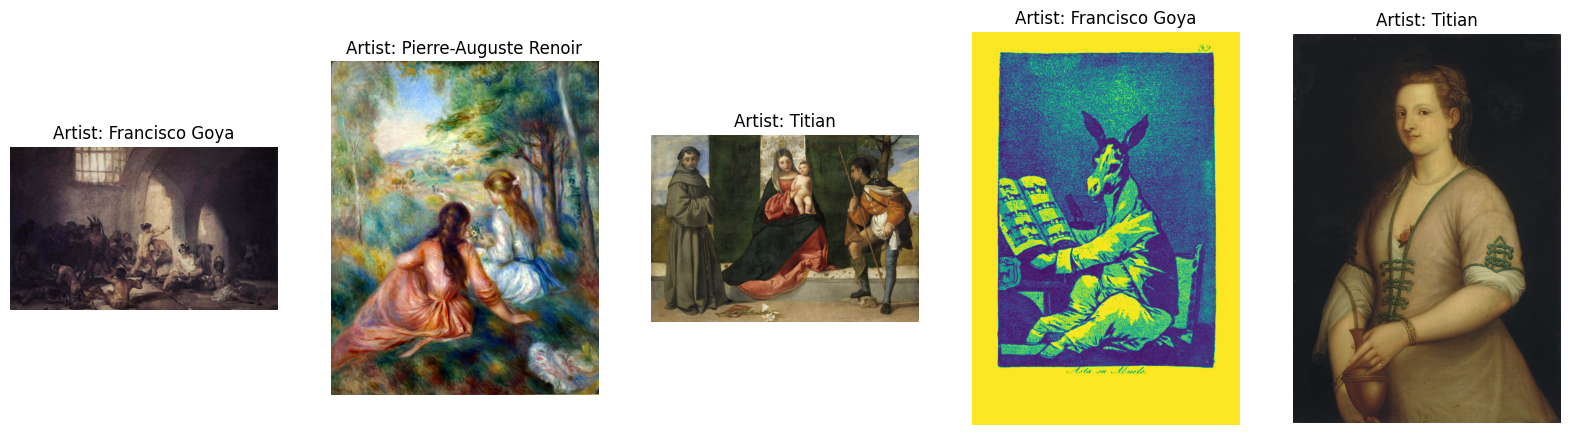

In [ ]:


import os
import pandas as pd
from text_unidecode import unidecode
import matplotlib.pyplot as plt
import random

# Example DataFrame, replace with your actual DataFrame
data = {
    'name': [
        'Vincent van Gogh', 'Edgar Degas', 'Pablo Picasso', 'Pierre-Auguste Renoir',
        'Albrecht Durer', 'Paul Gauguin', 'Francisco Goya', 'Rembrandt',
        'Alfred Sisley', 'Titian', 'Marc Chagall'
    ]
}
artists_top = pd.DataFrame(data)

# Update the name for "Albrecht Dürer"
updated_name = "Albrecht_Dürer".replace("_", " ")  # Update with specific encoding
artists_top.iloc[4, 0] = updated_name

# Directory containing artist images
images_dir ="/content/images/images/images"

# List and normalize all directories in the images directory
directories = os.listdir(images_dir)
normalized_directories = [unidecode(d).replace(' ', '_') for d in directories]
print("Normalized directories in images_dir:", normalized_directories)

# Replace spaces and handle special characters in artist names
artists_top_name = artists_top['name'].str.replace(' ', '_').values
normalized_artists_top_name = [unidecode(name) for name in artists_top_name]

# Manually handle the specific case for "Albrecht Dürer"
normalized_artists_top_name = [name.replace('ü', 'u') for name in normalized_artists_top_name]

# Specific mapping for the problematic case
specific_mappings = {
    'Albrecht_Durer': 'Albrecht_Du+erer'
}

# Create a mapping from artist names to directories
artist_dir_mapping = {name: specific_mappings.get(name, name) for name in normalized_artists_top_name}

# Print few random paintings
n = 5
fig, axes = plt.subplots(1, n, figsize=(20,10))

for i in range(n):
    random_artist = random.choice(list(artist_dir_mapping.keys()))
    artist_dir = artist_dir_mapping[random_artist]
    random_image = random.choice(os.listdir(os.path.join(images_dir, artist_dir)))
    random_image_file = os.path.join(images_dir, artist_dir, random_image)
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title("Artist: " + random_artist.replace('_', ' '))
    axes[i].axis('off')

plt.show()


In [ ]:
# Augment data
batch_size = 16
train_input_shape = (224, 224, 3)
n_classes = artists_top.shape[0]

train_datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale=1./255.,
                                   #rotation_range=45,
                                   #width_shift_range=0.5,
                                   #height_shift_range=0.5,
                                   shear_range=5,
                                   #zoom_range=0.7,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                  )

train_generator = train_datagen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=artists_top_name.tolist()
                                                   )

valid_generator = train_datagen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    shuffle=True,
                                                    classes=artists_top_name.tolist()
                                                   )

STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

Found 3181 images belonging to 11 classes.
Found 790 images belonging to 11 classes.
Total number of batches = 198 and 49


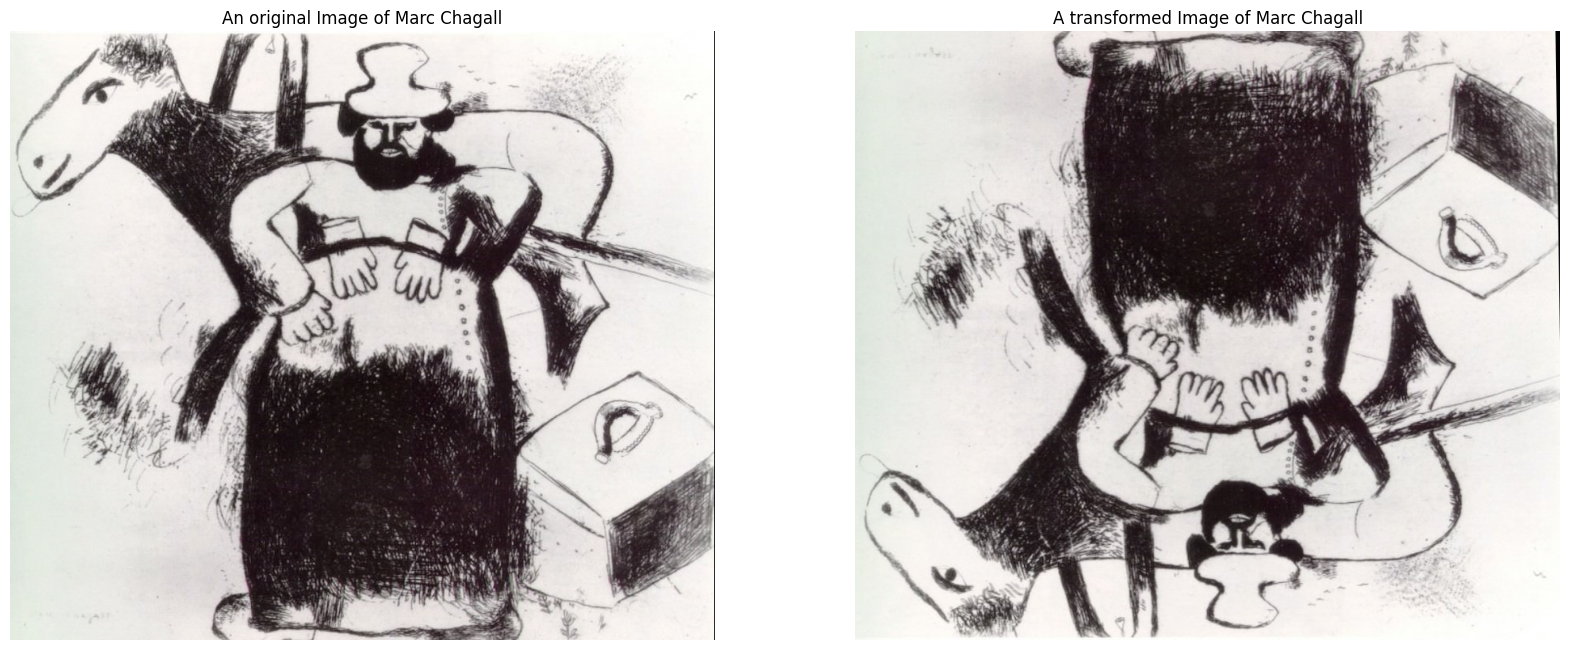

In [ ]:
# Print a random paintings and it's random augmented version
fig, axes = plt.subplots(1, 2, figsize=(20,10))

random_artist = random.choice(artists_top_name)
random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
random_image_file = os.path.join(images_dir, random_artist, random_image)

# Original image
image = plt.imread(random_image_file)
axes[0].imshow(image)
axes[0].set_title("An original Image of " + random_artist.replace('_', ' '))
axes[0].axis('off')

# Transformed image
aug_image = train_datagen.random_transform(image)
axes[1].imshow(aug_image)
axes[1].set_title("A transformed Image of " + random_artist.replace('_', ' '))
axes[1].axis('off')

plt.show()

In [ ]:
# Load pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=train_input_shape)

for layer in base_model.layers:
    layer.trainable = True

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Add layers at the end
X = base_model.output
X = Flatten()(X)

X = Dense(512, kernel_initializer='he_uniform')(X)
#X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(16, kernel_initializer='he_uniform')(X)
#X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

output = Dense(n_classes, activation='softmax')(X)

model = Model(inputs=base_model.input, outputs=output)

In [ ]:
optimizer = Adam(learning_rate =0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
n_epoch = 10

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1,
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,
                              verbose=1, mode='auto')

In [ ]:
# Train the model - all layers
history1 = model.fit(train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              callbacks=[reduce_lr],
                              use_multiprocessing=True,
                              workers=16,
                              class_weight=class_weights
                             )

Epoch 1/10


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


198/198 [==============================] - 185s 669ms/step - loss: 1.5276 - accuracy: 0.5043 - val_loss: 2.7158 - val_accuracy: 0.1327 - lr: 1.0000e-04
Epoch 2/10
198/198 [==============================] - 117s 571ms/step - loss: 1.1520 - accuracy: 0.7033 - val_loss: 3.4005 - val_accuracy: 0.0765 - lr: 1.0000e-04
Epoch 3/10
198/198 [==============================] - 120s 584ms/step - loss: 0.9926 - accuracy: 0.7697 - val_loss: 2.3349 - val_accuracy: 0.1671 - lr: 1.0000e-04
Epoch 4/10
198/198 [==============================] - 125s 603ms/step - loss: 0.8728 - accuracy: 0.8123 - val_loss: 2.1320 - val_accuracy: 0.2870 - lr: 1.0000e-04
Epoch 5/10
198/198 [==============================] - 133s 650ms/step - loss: 0.7507 - accuracy: 0.8594 - val_loss: 1.7349 - val_accuracy: 0.4477 - lr: 1.0000e-04
Epoch 6/10
198/198 [==============================] - 114s 542ms/step - loss: 0.6773 - accuracy: 0.8746 - val_loss: 1.0241 - val_accuracy: 0.7793 - lr: 1.0000e-04
Epoch 7/10
198/198 [=============

In [ ]:
# Freeze core ResNet layers and train again
for layer in model.layers:
    layer.trainable = False

for layer in model.layers[:1]:
    layer.trainable = True

optimizer = Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

n_epoch = 25
history2 = model.fit(train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              callbacks=[reduce_lr, early_stop],
                              use_multiprocessing=True,
                              workers=16,
                              class_weight=class_weights
                             )

Epoch 1/25
198/198 [==============================] - 117s 555ms/step - loss: 0.3558 - accuracy: 0.9498 - val_loss: 0.8572 - val_accuracy: 0.7717 - lr: 1.0000e-04
Epoch 2/25
198/198 [==============================] - 108s 516ms/step - loss: 0.3476 - accuracy: 0.9488 - val_loss: 0.8556 - val_accuracy: 0.7959 - lr: 1.0000e-04
Epoch 3/25
198/198 [==============================] - 124s 611ms/step - loss: 0.3483 - accuracy: 0.9555 - val_loss: 0.8470 - val_accuracy: 0.7997 - lr: 1.0000e-04
Epoch 4/25
198/198 [==============================] - 111s 539ms/step - loss: 0.3470 - accuracy: 0.9532 - val_loss: 0.8527 - val_accuracy: 0.7883 - lr: 1.0000e-04
Epoch 5/25
198/198 [==============================] - 106s 501ms/step - loss: 0.3456 - accuracy: 0.9526 - val_loss: 0.8684 - val_accuracy: 0.7832 - lr: 1.0000e-04
Epoch 6/25
198/198 [==============================] - 106s 503ms/step - loss: 0.3372 - accuracy: 0.9532 - val_loss: 0.8806 - val_accuracy: 0.7793 - lr: 1.0000e-04
Epoch 7/25
198/198 [==

In [ ]:
# Initialize an empty dictionary to hold the merged history
history = {}

# Merge the training and validation loss and accuracy
history['loss'] = history1.history['loss'] + history2.history['loss']
history['accuracy'] = history1.history['accuracy'] + history2.history['accuracy']
history['val_loss'] = history1.history['val_loss'] + history2.history['val_loss']
history['val_accuracy'] = history1.history['val_accuracy'] + history2.history['val_accuracy']

# Merge learning rate if it exists
if 'learning_rate' in history1.history and 'learning_rate' in history2.history:
    history['learning_rate'] = history1.history['learning_rate'] + history2.history['learning_rate']

# If any additional metrics were tracked, they should be merged similarly
# For example:
if 'precision' in history1.history and 'precision' in history2.history:
     history['precision'] = history1.history['precision'] + history2.history['precision']
if 'recall' in history1.history and 'recall' in history2.history:
     history['recall'] = history1.history['recall']





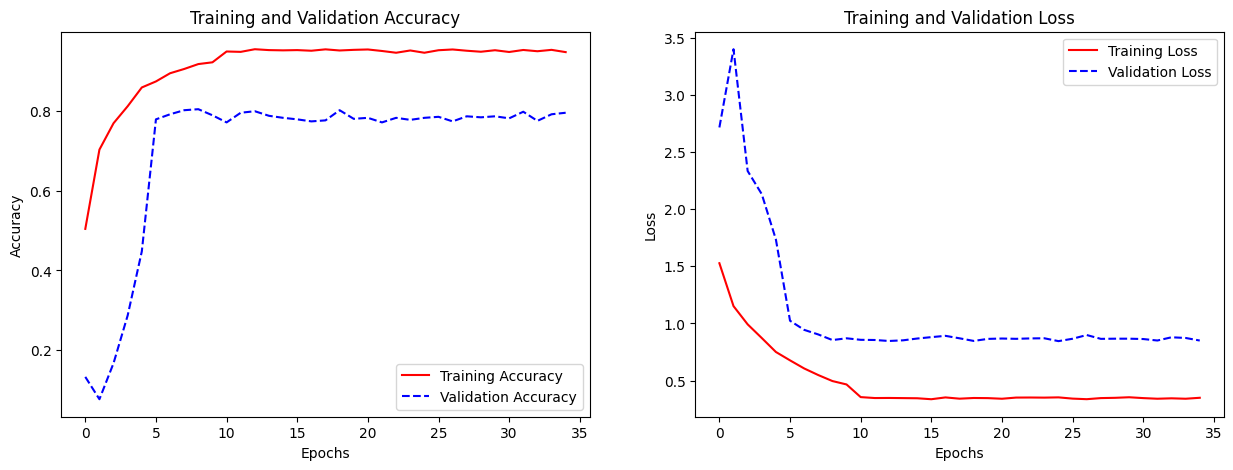

In [ ]:
import matplotlib.pyplot as plt

def plot_training(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].plot(epochs, acc, 'r-', label='Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label='Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend(loc='best')

    axes[1].plot(epochs, loss, 'r-', label='Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label='Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend(loc='best')

    plt.show()

plot_training(history)


In [ ]:
# Prediction accuracy on train data
score = model.evaluate_generator(train_generator, verbose=1)
print("Prediction accuracy on train data =", score[1])

<ipython-input-58-1dfa5047d603>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(train_generator, verbose=1)


199/199 [==============================] - 63s 315ms/step - loss: 0.4070 - accuracy: 0.9488
Prediction accuracy on train data = 0.9487582445144653


In [ ]:
# Evaluate the model on the training data
score = model.evaluate(train_generator, verbose=1)

# Print all evaluation metrics
print("Evaluation on training data:")
for metric_name, metric_value in zip(model.metrics_names, score):
    print(f"{metric_name}: {metric_value}")


199/199 [==============================] - 74s 371ms/step - loss: 0.6108 - accuracy: 0.8915
Evaluation on training data:
loss: 0.6108470559120178
accuracy: 0.8915435671806335


In [ ]:
# Prediction accuracy on CV data
score = model.evaluate_generator(valid_generator, verbose=1)
print("Prediction accuracy on CV data =", score[1])


<ipython-input-59-d4a6d1ee285c>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(valid_generator, verbose=1)


50/50 [==============================] - 20s 408ms/step - loss: 1.0546 - accuracy: 0.7215
Prediction accuracy on CV data = 0.7215189933776855


1/1 [==============================] - 0s 28ms/step


<ipython-input-59-ad6e7b2e12b1>:30: RuntimeWarning: invalid value encountered in divide
  conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1)


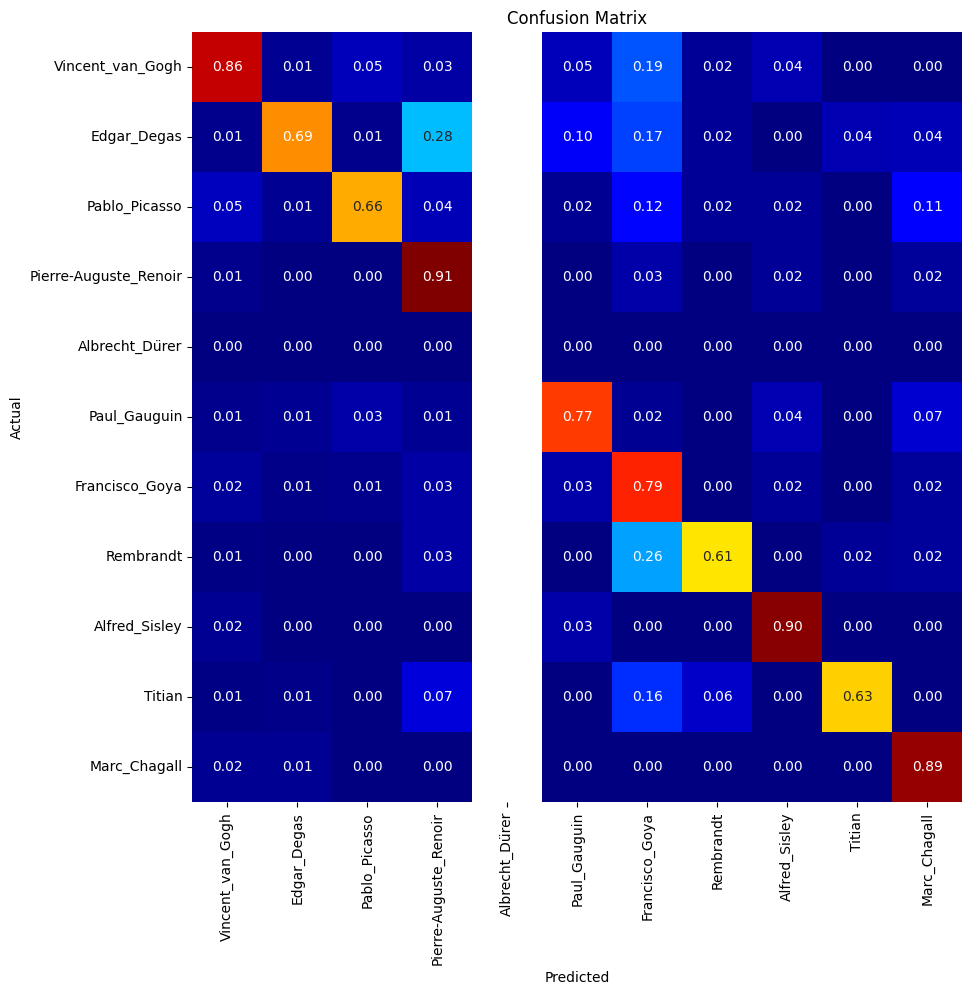

Classification Report:
                       precision    recall  f1-score   support

     Vincent_van_Gogh       0.85      0.86      0.85       174
          Edgar_Degas       0.91      0.69      0.78       139
        Pablo_Picasso       0.86      0.66      0.75        86
Pierre-Auguste_Renoir       0.64      0.91      0.75        67
      Albrecht_Dürer       0.00      0.00      0.00         0
         Paul_Gauguin       0.77      0.77      0.77        61
       Francisco_Goya       0.46      0.79      0.58        58
            Rembrandt       0.84      0.61      0.70        51
        Alfred_Sisley       0.87      0.90      0.88        51
               Titian       0.91      0.63      0.74        51
         Marc_Chagall       0.76      0.89      0.82        46

            micro avg       0.77      0.77      0.77       784
            macro avg       0.71      0.70      0.69       784
         weighted avg       0.81      0.77      0.78       784



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Classification report and confusion matrix
from sklearn.metrics import *
import seaborn as sns

tick_labels = artists_top_name.tolist()

def showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID):
    # Loop on each generator batch and predict
    y_pred, y_true = [], []
    for i in range(STEP_SIZE_VALID):
        (X,y) = next(valid_generator)
        y_pred.append(model.predict(X))
        y_true.append(y)

    # Create a flat list for y_true and y_pred
    y_pred = [subresult for result in y_pred for subresult in result]
    y_true = [subresult for result in y_true for subresult in result]

    # Update Truth vector based on argmax
    y_true = np.argmax(y_true, axis=1)
    y_true = np.asarray(y_true).ravel()

    # Update Prediction vector based on argmax
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = np.asarray(y_pred).ravel()

    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(10,10))
    conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(n_classes))
    conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1)
    sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=False,
                cmap=plt.cm.jet, xticklabels=tick_labels, yticklabels=tick_labels,
                ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion Matrix')
    plt.show()

    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=np.arange(n_classes), target_names=artists_top_name.tolist()))

showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID)

1/1 [==============================] - 0s 45ms/step
Micro-average
Precision: 0.72
Recall: 0.72
F1-score: 0.72
Support: 774

Macro-average
Precision: 0.70
Recall: 0.67
F1-score: 0.65


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

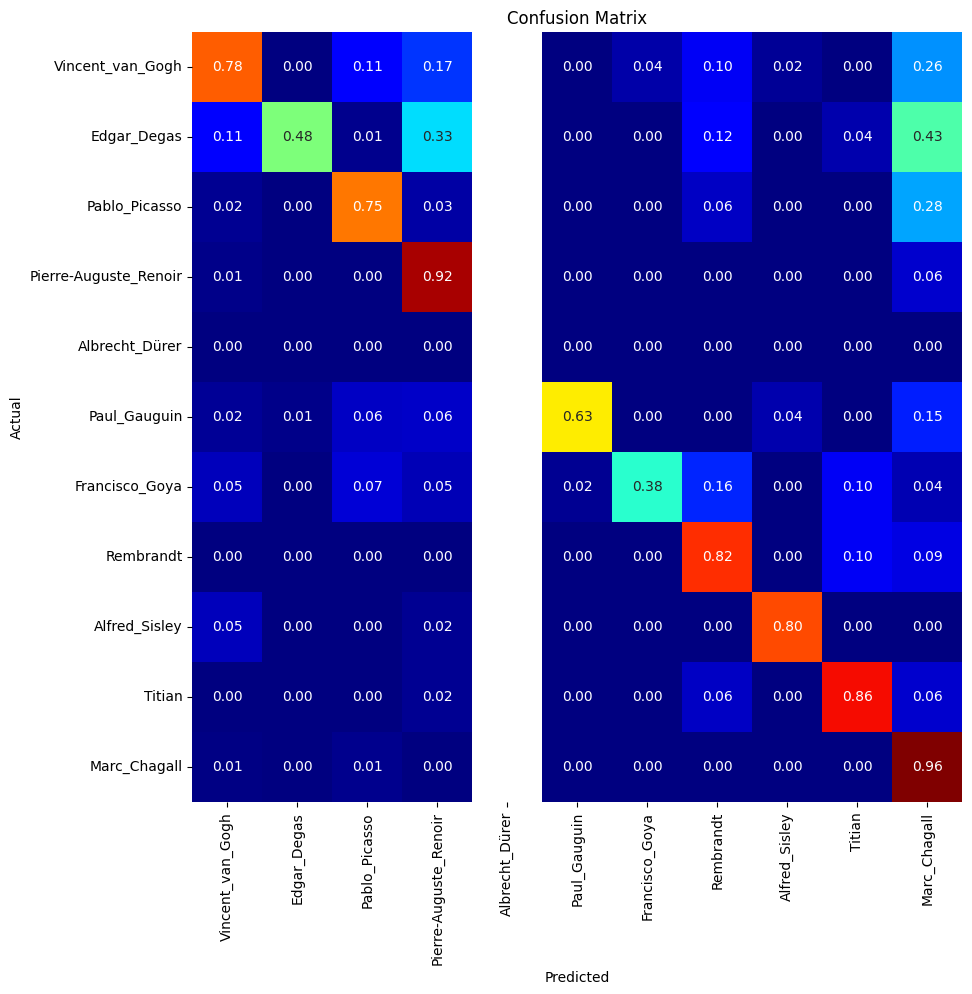

In [ ]:
from sklearn.metrics import classification_report

def showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID):
    # Loop on each generator batch and predict
    y_pred, y_true = [], []
    for i in range(STEP_SIZE_VALID):
        (X, y) = next(valid_generator)
        y_pred.append(model.predict(X))
        y_true.append(y)

    # Create a flat list for y_true and y_pred
    y_pred = [subresult for result in y_pred for subresult in result]
    y_true = [subresult for result in y_true for subresult in result]

    # Update Truth vector based on argmax
    y_true = np.argmax(y_true, axis=1)
    y_true = np.asarray(y_true).ravel()

    # Update Prediction vector based on argmax
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = np.asarray(y_pred).ravel()

    # Calculate classification report
    report = classification_report(y_true, y_pred, labels=np.arange(n_classes), target_names=artists_top_name.tolist(), output_dict=True)

    # Micro-average scores
    micro_precision = report['micro avg']['precision']
    micro_recall = report['micro avg']['recall']
    micro_f1 = report['micro avg']['f1-score']
    micro_support = report['micro avg']['support']

    # Macro-average scores
    macro_precision = report['macro avg']['precision']
    macro_recall = report['macro avg']['recall']
    macro_f1 = report['macro avg']['f1-score']

    print("Micro-average")
    print(f"Precision: {micro_precision:.2f}")
    print(f"Recall: {micro_recall:.2f}")
    print(f"F1-score: {micro_f1:.2f}")
    print(f"Support: {micro_support}")

    print("\nMacro-average")
    print(f"Precision: {macro_precision:.2f}")
    print(f"Recall: {macro_recall:.2f}")
    print(f"F1-score: {macro_f1:.2f}")

    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(10,10))
    conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(n_classes))
    conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)
    sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=False,
                cmap=plt.cm.jet, xticklabels=tick_labels, yticklabels=tick_labels,
                ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion Matrix')
    plt.show()

# Example usage
showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID)



1/1 [==============================] - 0s 27ms/step
Accuracy: 0.69
Micro-average
Precision: 0.69
Recall: 0.69
F1-score: 0.69
Support: 774

Macro-average
Precision: 0.68
Recall: 0.66
F1-score: 0.63


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

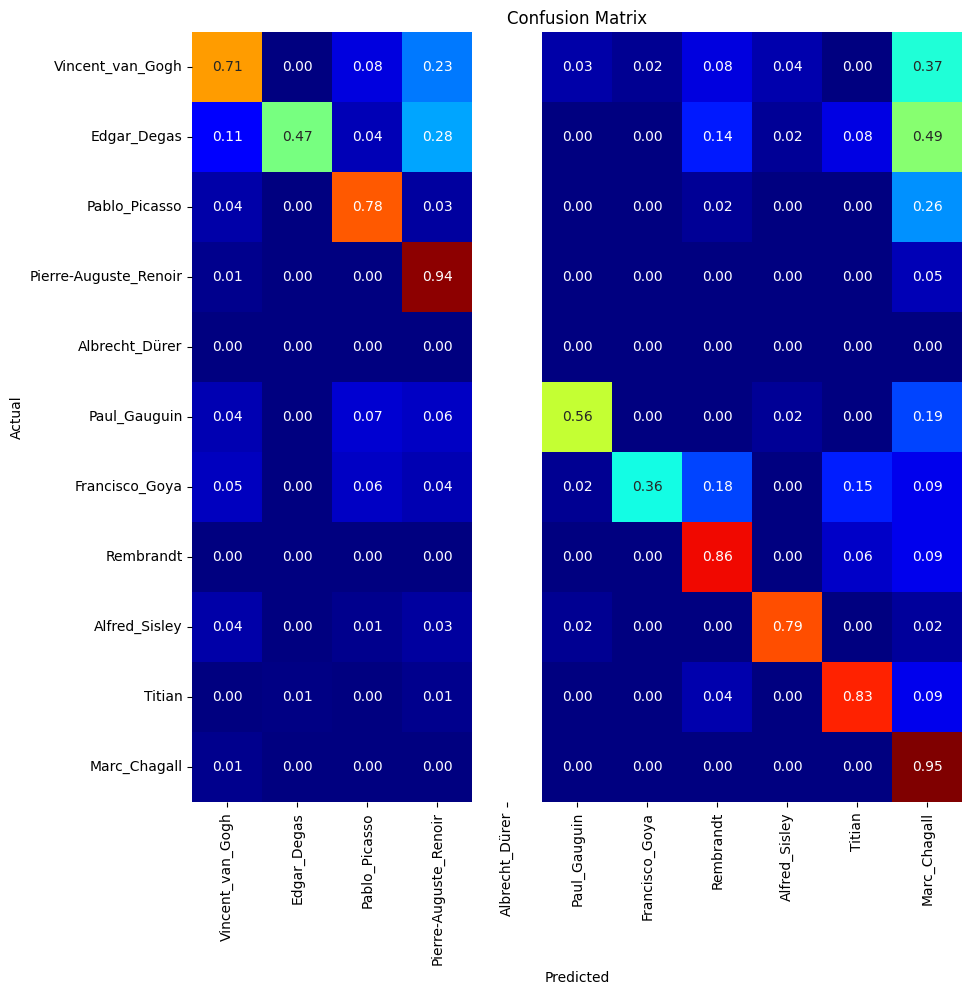

In [ ]:
from sklearn.metrics import accuracy_score

def showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID):
    # Loop on each generator batch and predict
    y_pred, y_true = [], []
    for i in range(STEP_SIZE_VALID):
        (X, y) = next(valid_generator)
        y_pred.append(model.predict(X))
        y_true.append(y)

    # Create a flat list for y_true and y_pred
    y_pred = [subresult for result in y_pred for subresult in result]
    y_true = [subresult for result in y_true for subresult in result]

    # Update Truth vector based on argmax
    y_true = np.argmax(y_true, axis=1)
    y_true = np.asarray(y_true).ravel()

    # Update Prediction vector based on argmax
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = np.asarray(y_pred).ravel()

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Calculate classification report
    report = classification_report(y_true, y_pred, labels=np.arange(n_classes), target_names=artists_top_name.tolist(), output_dict=True)

    # Micro-average scores
    micro_precision = report['micro avg']['precision']
    micro_recall = report['micro avg']['recall']
    micro_f1 = report['micro avg']['f1-score']
    micro_support = report['micro avg']['support']

    # Macro-average scores
    macro_precision = report['macro avg']['precision']
    macro_recall = report['macro avg']['recall']
    macro_f1 = report['macro avg']['f1-score']

    print("Micro-average")
    print(f"Precision: {micro_precision:.2f}")
    print(f"Recall: {micro_recall:.2f}")
    print(f"F1-score: {micro_f1:.2f}")
    print(f"Support: {micro_support}")

    print("\nMacro-average")
    print(f"Precision: {macro_precision:.2f}")
    print(f"Recall: {macro_recall:.2f}")
    print(f"F1-score: {macro_f1:.2f}")

    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(10,10))
    conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(n_classes))
    conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1)
    sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=False,
                cmap=plt.cm.jet, xticklabels=tick_labels, yticklabels=tick_labels,
                ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion Matrix')
    plt.show()

# Example usage
showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID)


1/1 [==============================] - 0s 118ms/step


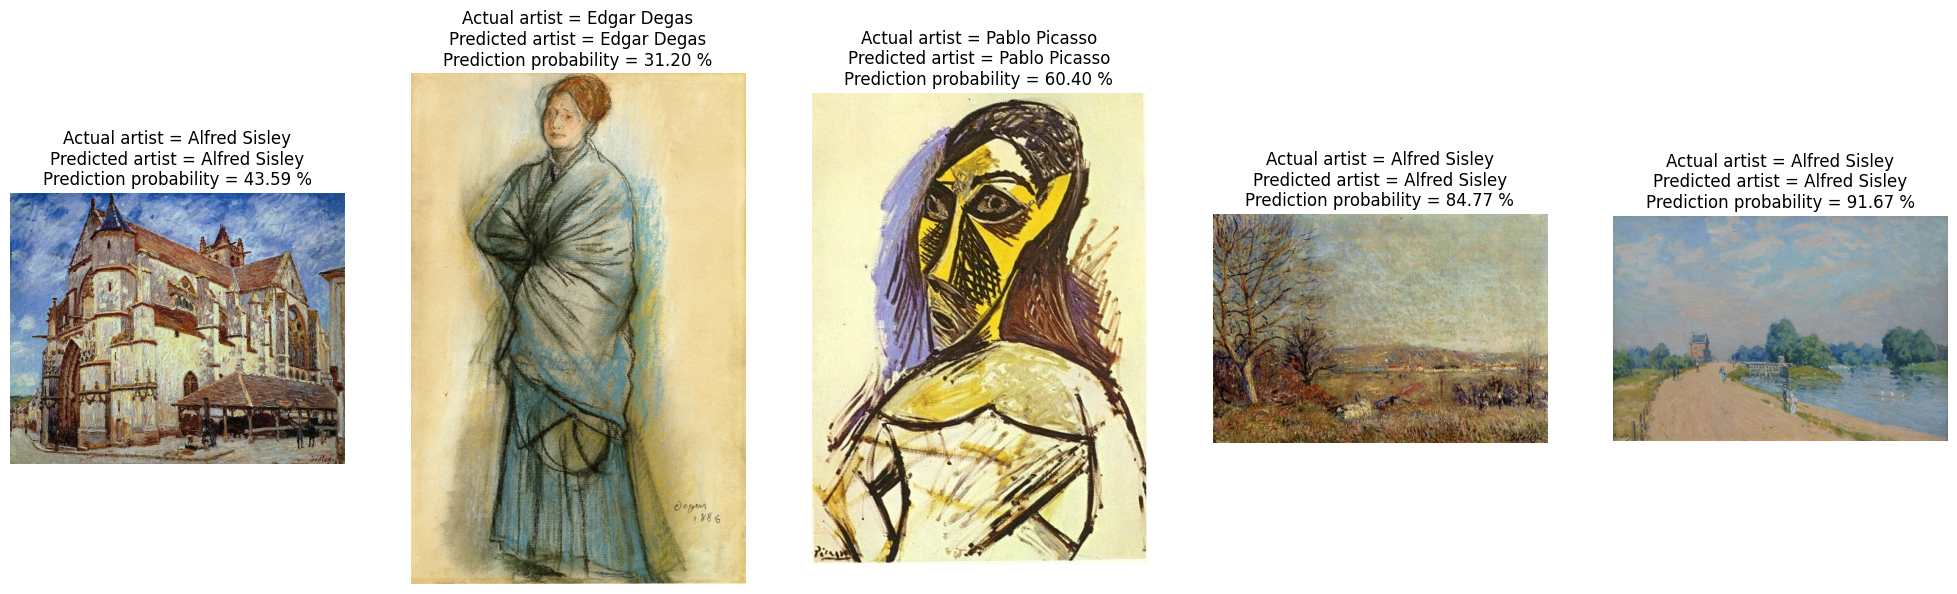

In [ ]:
# Prediction
from keras.preprocessing import *

n = 5
fig, axes = plt.subplots(1, n, figsize=(25,10))

for i in range(n):
    random_artist = random.choice(artists_top_name)
    random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
    random_image_file = os.path.join(images_dir, random_artist, random_image)

    # Original image

    test_image = image.load_img(random_image_file, target_size=(train_input_shape[0:2]))

    # Predict artist
    test_image = image.img_to_array(test_image)
    test_image /= 255.
    test_image = np.expand_dims(test_image, axis=0)

    prediction = model.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)

    labels = train_generator.class_indices
    labels = dict((v,k) for k,v in labels.items())

    #print("Actual artist =", random_artist.replace('_', ' '))
    #print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
    #print("Prediction probability =", prediction_probability*100, "%")

    title = "Actual artist = {}\nPredicted artist = {}\nPrediction probability = {:.2f} %" \
                .format(random_artist.replace('_', ' '), labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)

    # Print image
    axes[i].imshow(plt.imread(random_image_file))
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()

1/1 [==============================] - 0s 22ms/step


<ipython-input-63-2103ed001bba>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  web_image = imageio.imread(url)
<ipython-input-63-2103ed001bba>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(url))


Predicted artist = Titian
Prediction probability = 29.13220226764679 %


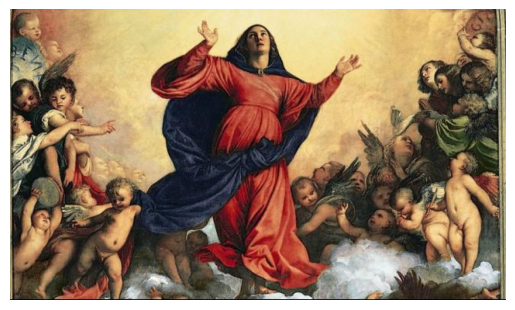

In [ ]:
# Predict from web - this is an image of Titian.
# Replace 'url' with any image of one of the 11 artists above and run this cell.
url = 'https://www.gpsmycity.com/img/gd/2081.jpg'

import imageio
import cv2

web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 24ms/step


<ipython-input-67-c003ca5d39bb>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  web_image = imageio.imread(url)
<ipython-input-67-c003ca5d39bb>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(url))


Predicted artist = Pablo Picasso
Prediction probability = 30.285918712615967 %


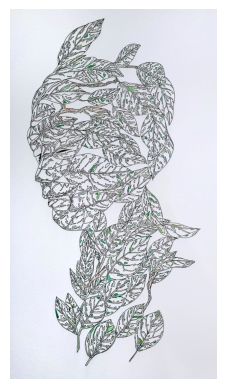

In [ ]:
# Predict from web - this is an image of Titian.
# Replace 'url' with any image of one of the 11 artists above and run this cell.
url = '/content/4.jpeg'

import imageio
import cv2

web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()

In [ ]:
# Predict from web - this is an image of Titian.
# Replace 'url' with any image of one of the 11 artists above and run this cell.
url = 'https://en.wikipedia.org/wiki/File:Pala_pesaro_03.jpg'

import imageio
import cv2

web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()

<ipython-input-91-5cc9517079c6>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  web_image = imageio.imread(url)


AttributeError: 'SeekableFileObject' object has no attribute 'readline'

<ipython-input-96-5476f4fad16e>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  web_image = imageio.imread(url)


1/1 [==============================] - 0s 45ms/step
Predicted artist = Titian
Prediction probability = 57.63391852378845 %


<ipython-input-96-5476f4fad16e>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(url))


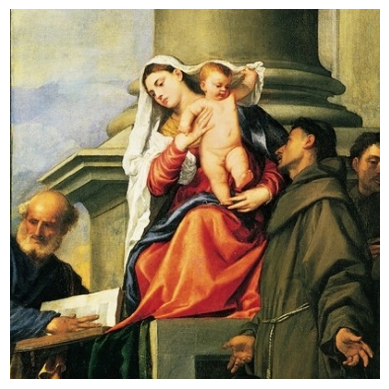

In [ ]:
# Predict from web - this is an image of Titian.
# Replace 'url' with any image of one of the 11 artists above and run this cell.
url = 'http://www.italianrenaissance.org/wp-content/uploads/2012/07/Titian-Pesaro-Madonna-detail1.jpg'

import imageio
import cv2

web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()

1/1 [==============================] - ETA: 0s

<ipython-input-77-8ef3aca426bb>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  web_image = imageio.imread(url)


1/1 [==============================] - 0s 37ms/step
Predicted artist = Vincent van Gogh
Prediction probability = 39.610156416893005 %


<ipython-input-77-8ef3aca426bb>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(url))


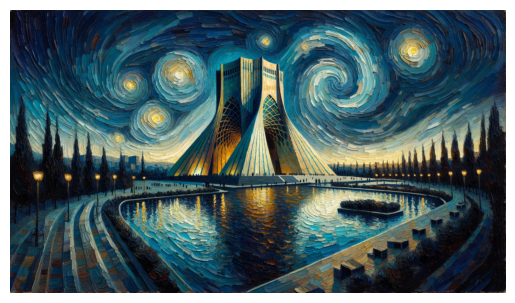

In [ ]:
# Predict from web - this is an image of Titian.
# Replace 'url' with any image of one of the 11 artists above and run this cell.
url = '/content/5ee6c829-3250-46d5-a167-22131d5e583e.webp'

import imageio
import cv2

web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 23ms/step


<ipython-input-83-fb3a95665af3>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  web_image = imageio.imread(url)
<ipython-input-83-fb3a95665af3>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(url))


Predicted artist = Pierre-Auguste Renoir
Prediction probability = 24.33365136384964 %


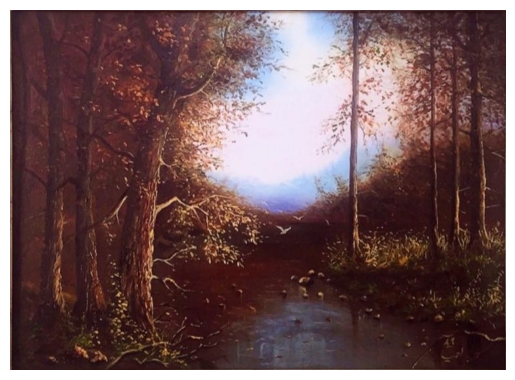

In [ ]:
# Predict from web - this is an image of Titian.
# Replace 'url' with any image of one of the 11 artists above and run this cell.
url = '/content/pic1.jpg'

import imageio
import cv2

web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 33ms/step


<ipython-input-82-2ded78c0d079>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  web_image = imageio.imread(url)
<ipython-input-82-2ded78c0d079>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(url))


Predicted artist = Vincent van Gogh
Prediction probability = 23.704145848751068 %


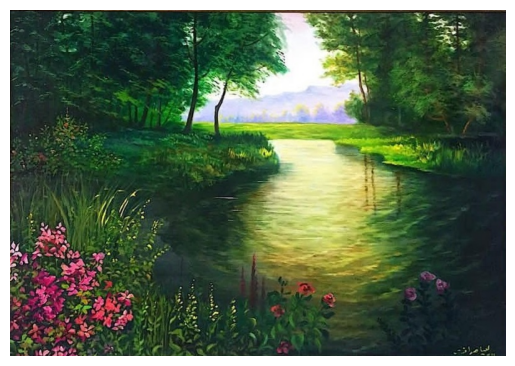

In [ ]:
# Predict from web - this is an image of Titian.
# Replace 'url' with any image of one of the 11 artists above and run this cell.
url = '/content/pic2.jpg'

import imageio
import cv2

web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import requests
from PIL import Image
from io import BytesIO  # Importing BytesIO module from io
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras import backend as K

def grad_cam(model, img_url, layer_name, num_classes):
    # Fetch the image content from the URL
    response = requests.get(img_url)
    img = image.img_to_array(Image.open(BytesIO(response.content)).convert("RGB"))
    img = cv2.resize(img, (224, 224))
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    predicted_class = np.argmax(preds[0])

    # Get the output of the specified layer and compute the gradient of the predicted class
    last_conv_layer = model.get_layer(layer_name)
    grads = K.gradients(model.output[:, predicted_class], last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])

    # Multiply each channel in the feature map by "how important this channel is" with regard to the predicted class
    for i in range(num_classes):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    # Average the weighted feature map along the channel dimension to get the heatmap
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    # Resize heatmap to match the size of the input image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose the heatmap on the input image
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

    return superimposed_img

# Example usage
img_url = 'https://www.gpsmycity.com/img/gd/2081.jpg'  # Update with the actual path to your image
layer_name = 'block5_conv3'  # Choose the layer from which you want to extract the gradients
num_classes = 10  # Number of classes in your classification task
saliency_map = grad_cam(model, img_url, layer_name, num_classes)
plt.imshow(saliency_map)
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 135ms/step


ValueError: No such layer: block5_conv3. Existing layers are: ['input_1', 'conv1_pad', 'conv1_conv', 'conv1_bn', 'conv1_relu', 'pool1_pad', 'pool1_pool', 'conv2_block1_1_conv', 'conv2_block1_1_bn', 'conv2_block1_1_relu', 'conv2_block1_2_conv', 'conv2_block1_2_bn', 'conv2_block1_2_relu', 'conv2_block1_0_conv', 'conv2_block1_3_conv', 'conv2_block1_0_bn', 'conv2_block1_3_bn', 'conv2_block1_add', 'conv2_block1_out', 'conv2_block2_1_conv', 'conv2_block2_1_bn', 'conv2_block2_1_relu', 'conv2_block2_2_conv', 'conv2_block2_2_bn', 'conv2_block2_2_relu', 'conv2_block2_3_conv', 'conv2_block2_3_bn', 'conv2_block2_add', 'conv2_block2_out', 'conv2_block3_1_conv', 'conv2_block3_1_bn', 'conv2_block3_1_relu', 'conv2_block3_2_conv', 'conv2_block3_2_bn', 'conv2_block3_2_relu', 'conv2_block3_3_conv', 'conv2_block3_3_bn', 'conv2_block3_add', 'conv2_block3_out', 'conv3_block1_1_conv', 'conv3_block1_1_bn', 'conv3_block1_1_relu', 'conv3_block1_2_conv', 'conv3_block1_2_bn', 'conv3_block1_2_relu', 'conv3_block1_0_conv', 'conv3_block1_3_conv', 'conv3_block1_0_bn', 'conv3_block1_3_bn', 'conv3_block1_add', 'conv3_block1_out', 'conv3_block2_1_conv', 'conv3_block2_1_bn', 'conv3_block2_1_relu', 'conv3_block2_2_conv', 'conv3_block2_2_bn', 'conv3_block2_2_relu', 'conv3_block2_3_conv', 'conv3_block2_3_bn', 'conv3_block2_add', 'conv3_block2_out', 'conv3_block3_1_conv', 'conv3_block3_1_bn', 'conv3_block3_1_relu', 'conv3_block3_2_conv', 'conv3_block3_2_bn', 'conv3_block3_2_relu', 'conv3_block3_3_conv', 'conv3_block3_3_bn', 'conv3_block3_add', 'conv3_block3_out', 'conv3_block4_1_conv', 'conv3_block4_1_bn', 'conv3_block4_1_relu', 'conv3_block4_2_conv', 'conv3_block4_2_bn', 'conv3_block4_2_relu', 'conv3_block4_3_conv', 'conv3_block4_3_bn', 'conv3_block4_add', 'conv3_block4_out', 'conv4_block1_1_conv', 'conv4_block1_1_bn', 'conv4_block1_1_relu', 'conv4_block1_2_conv', 'conv4_block1_2_bn', 'conv4_block1_2_relu', 'conv4_block1_0_conv', 'conv4_block1_3_conv', 'conv4_block1_0_bn', 'conv4_block1_3_bn', 'conv4_block1_add', 'conv4_block1_out', 'conv4_block2_1_conv', 'conv4_block2_1_bn', 'conv4_block2_1_relu', 'conv4_block2_2_conv', 'conv4_block2_2_bn', 'conv4_block2_2_relu', 'conv4_block2_3_conv', 'conv4_block2_3_bn', 'conv4_block2_add', 'conv4_block2_out', 'conv4_block3_1_conv', 'conv4_block3_1_bn', 'conv4_block3_1_relu', 'conv4_block3_2_conv', 'conv4_block3_2_bn', 'conv4_block3_2_relu', 'conv4_block3_3_conv', 'conv4_block3_3_bn', 'conv4_block3_add', 'conv4_block3_out', 'conv4_block4_1_conv', 'conv4_block4_1_bn', 'conv4_block4_1_relu', 'conv4_block4_2_conv', 'conv4_block4_2_bn', 'conv4_block4_2_relu', 'conv4_block4_3_conv', 'conv4_block4_3_bn', 'conv4_block4_add', 'conv4_block4_out', 'conv4_block5_1_conv', 'conv4_block5_1_bn', 'conv4_block5_1_relu', 'conv4_block5_2_conv', 'conv4_block5_2_bn', 'conv4_block5_2_relu', 'conv4_block5_3_conv', 'conv4_block5_3_bn', 'conv4_block5_add', 'conv4_block5_out', 'conv4_block6_1_conv', 'conv4_block6_1_bn', 'conv4_block6_1_relu', 'conv4_block6_2_conv', 'conv4_block6_2_bn', 'conv4_block6_2_relu', 'conv4_block6_3_conv', 'conv4_block6_3_bn', 'conv4_block6_add', 'conv4_block6_out', 'conv5_block1_1_conv', 'conv5_block1_1_bn', 'conv5_block1_1_relu', 'conv5_block1_2_conv', 'conv5_block1_2_bn', 'conv5_block1_2_relu', 'conv5_block1_0_conv', 'conv5_block1_3_conv', 'conv5_block1_0_bn', 'conv5_block1_3_bn', 'conv5_block1_add', 'conv5_block1_out', 'conv5_block2_1_conv', 'conv5_block2_1_bn', 'conv5_block2_1_relu', 'conv5_block2_2_conv', 'conv5_block2_2_bn', 'conv5_block2_2_relu', 'conv5_block2_3_conv', 'conv5_block2_3_bn', 'conv5_block2_add', 'conv5_block2_out', 'conv5_block3_1_conv', 'conv5_block3_1_bn', 'conv5_block3_1_relu', 'conv5_block3_2_conv', 'conv5_block3_2_bn', 'conv5_block3_2_relu', 'conv5_block3_3_conv', 'conv5_block3_3_bn', 'conv5_block3_add', 'conv5_block3_out', 'flatten', 'dense', 'batch_normalization', 'activation', 'dense_1', 'batch_normalization_1', 'activation_1', 'dense_2'].

In [ ]:
# Check available layer names in the model
for layer in model.layers:
    print(layer.name)


input_1
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
conv3_

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from keras.applications import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
import tensorflow as tf

def load_and_preprocess_image(url, target_size=(224, 224)):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def grad_cam(model, img, layer_name, num_classes):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    output = conv_output[0]
    grads = tape.gradient(loss, conv_output)[0]

    guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

    weights = tf.reduce_mean(guided_grads, axis=(0, 1))

    cam = tf.reduce_sum(tf.multiply(weights, output), axis=-1)
    cam = np.maximum(cam, 0)

    heatmap = cam / np.max(cam)
    heatmap = tf.image.resize(heatmap, (224, 224))
    heatmap = tf.expand_dims(heatmap, axis=-1)
    return heatmap.numpy()

# Load ResNet50 model
model = ResNet50(weights='imagenet')

# Define the image URL
img_url = 'https://www.gpsmycity.com/img/gd/2081.jpg'

# Define the layer name for which you want to generate the saliency map
layer_name = 'conv5_block3_out'  # Choose the layer from which you want to extract the gradients

# Number of classes in your classification task
num_classes = 1000

# Load and preprocess the image
img = load_and_preprocess_image(img_url)

# Generate saliency map
saliency_map = grad_cam(model, img, layer_name, num_classes)

# Show the original image and the saliency map
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Saliency Map')
plt.imshow(saliency_map.squeeze(), cmap='hot')
plt.axis('off')

plt.show()


ValueError: 'images' must have either 3 or 4 dimensions.

NameError: name 'response' is not defined

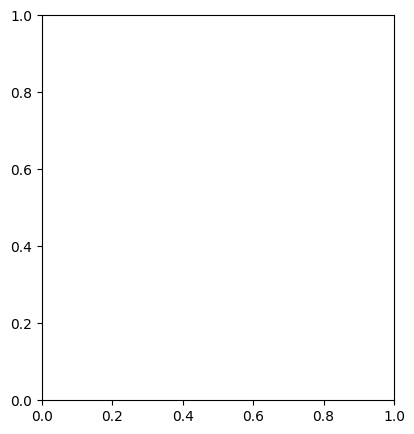

In [ ]:
import requests
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define a function to load and preprocess the image
def load_and_preprocess_image(img_url):
    # Download the image from the URL
    response = requests.get(img_url)
    img = Image.open(io.BytesIO(response.content))
    img = img.convert('RGB')  # Ensure the image is in RGB format
    img = img.resize((224, 224))  # Resize the image to match the input size for ResNet50
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Load the ResNet50 model
model = tf.keras.applications.ResNet50(weights='imagenet')

# Load and preprocess the image from the URL
img_url = 'https://www.gpsmycity.com/img/gd/2081.jpg'
img = load_and_preprocess_image(img_url)

# Define the layer from which you want to extract gradients
layer_name = 'conv5_block3_out'  # Choose the layer from which you want to extract the gradients

# Define the number of classes in your classification task
num_classes = 1000  # Number of classes in ImageNet

# Define a function to compute the gradient-weighted class activation map (Grad-CAM)
def grad_cam(model, img_array, layer_name, num_classes):
    grad_model = Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, np.argmax(predictions[0])]
    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]
    gate_f = tf.cast(output > 0, 'float32')
    gate_r = tf.cast(grads > 0, 'float32')
    guided_grads = gate_f * gate_r * grads
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, output), axis=-1)
    cam = np.maximum(cam, 0)  # Apply ReLU to remove negative values
    cam /= np.max(cam)  # Normalize to [0,1]
    return cam

# Generate the saliency map
saliency_map = grad_cam(model, img, layer_name, num_classes)

# Plot the original image and the saliency map
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Image.open(io.BytesIO(response.content)))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(saliency_map, cmap='jet', alpha=0.5)
plt.title('Saliency Map')
plt.axis('off')
plt.show()


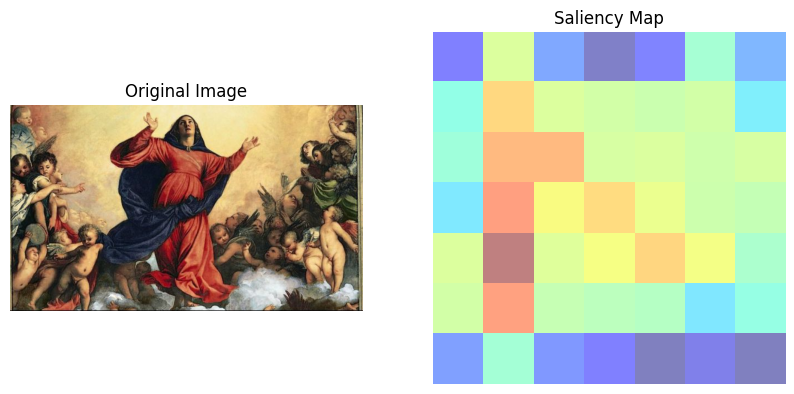

In [ ]:
import requests
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define a function to load and preprocess the image
def load_and_preprocess_image(img_url):
    # Download the image from the URL
    response = requests.get(img_url)
    img = Image.open(io.BytesIO(response.content))
    img = img.convert('RGB')  # Ensure the image is in RGB format
    img = img.resize((224, 224))  # Resize the image to match the input size for ResNet50
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Load the ResNet50 model
model = tf.keras.applications.ResNet50(weights='imagenet')

# Load and preprocess the image from the URL
img_url = 'https://www.gpsmycity.com/img/gd/2081.jpg'
img = load_and_preprocess_image(img_url)

# Define the layer from which you want to extract gradients
layer_name = 'conv5_block3_out'  # Choose the layer from which you want to extract the gradients

# Define the number of classes in your classification task
num_classes = 1000  # Number of classes in ImageNet

# Define a function to compute the gradient-weighted class activation map (Grad-CAM)
def grad_cam(model, img_array, layer_name, num_classes):
    grad_model = Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, np.argmax(predictions[0])]
    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]
    gate_f = tf.cast(output > 0, 'float32')
    gate_r = tf.cast(grads > 0, 'float32')
    guided_grads = gate_f * gate_r * grads
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, output), axis=-1)
    cam = np.maximum(cam, 0)  # Apply ReLU to remove negative values
    cam /= np.max(cam)  # Normalize to [0,1]
    return cam

# Generate the saliency map
saliency_map = grad_cam(model, img, layer_name, num_classes)

# Plot the original image and the saliency map
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Image.open(io.BytesIO(requests.get(img_url).content)))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(saliency_map, cmap='jet', alpha=0.5)
plt.title('Saliency Map')
plt.axis('off')
plt.show()


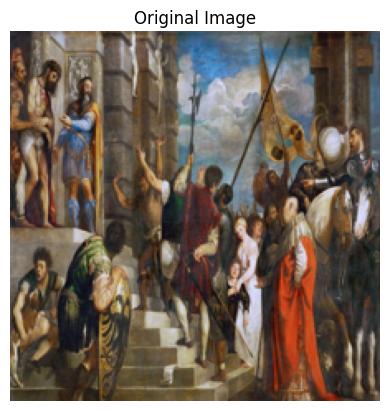

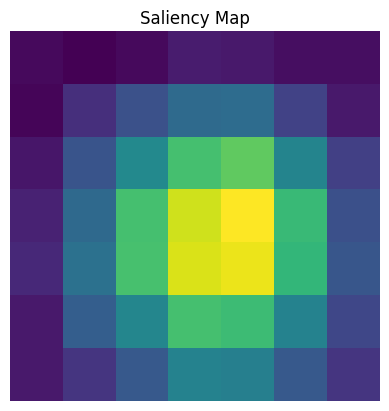

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Function to load and preprocess an image
def load_and_preprocess_image(img_path):
    img = Image.open(img_path)
    img = img.convert('RGB')  # Ensure the image is in RGB format
    img = img.resize((224, 224))  # Resize the image to match the input size for the model
    img = np.array(img) / 255.0  # Normalize the pixel values to the range [0, 1]
    return img

# Load and preprocess the specific image
img_path = "/content/images/images/Titian/Titian_1.jpg"
img_data = load_and_preprocess_image(img_path)

# Display the original image
plt.figure()
plt.imshow(img_data)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Add batch dimension
img_data = np.expand_dims(img_data, axis=0)

# Generate saliency map
saliency_map = grad_cam(model, img_data, layer_name, num_classes)

# Display saliency map
plt.figure()
plt.imshow(saliency_map)
plt.title('Saliency Map')
plt.axis('off')
plt.show()


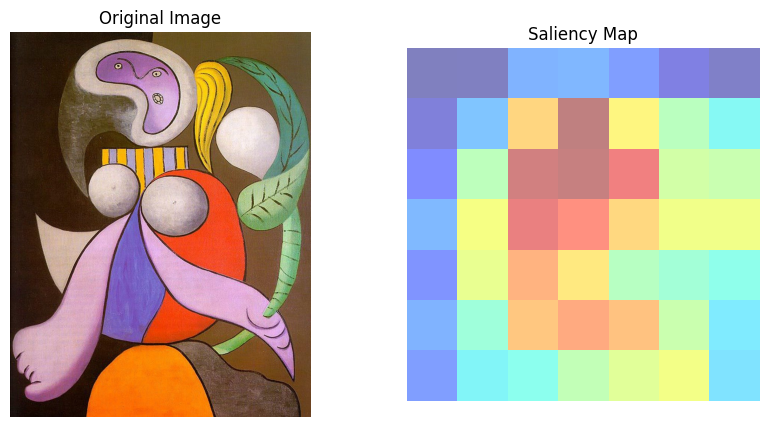

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define a function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = Image.open(img_path)
    img = img.convert('RGB')  # Ensure the image is in RGB format
    img = img.resize((224, 224))  # Resize the image to match the input size for ResNet50
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Load the ResNet50 model
model = tf.keras.applications.ResNet50(weights='imagenet')

# Load and preprocess the image from the file path
img_path = '/content/images/images/Pablo_Picasso/Pablo_Picasso_219.jpg'
img = load_and_preprocess_image(img_path)

# Define the layer from which you want to extract gradients
layer_name = 'conv5_block3_out'  # Choose the layer from which you want to extract the gradients

# Define the number of classes in your classification task
num_classes = 1000  # Number of classes in ImageNet

# Define a function to compute the gradient-weighted class activation map (Grad-CAM)
def grad_cam(model, img_array, layer_name, num_classes):
    grad_model = Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, np.argmax(predictions[0])]
    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]
    gate_f = tf.cast(output > 0, 'float32')
    gate_r = tf.cast(grads > 0, 'float32')
    guided_grads = gate_f * gate_r * grads
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, output), axis=-1)
    cam = np.maximum(cam, 0)  # Apply ReLU to remove negative values
    cam /= np.max(cam)  # Normalize to [0,1]
    return cam

# Generate the saliency map
saliency_map = grad_cam(model, img, layer_name, num_classes)

# Plot the original image and the saliency map
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Image.open(img_path))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(saliency_map, cmap='jet', alpha=0.5)
plt.title('Saliency Map')
plt.axis('off')
plt.show()


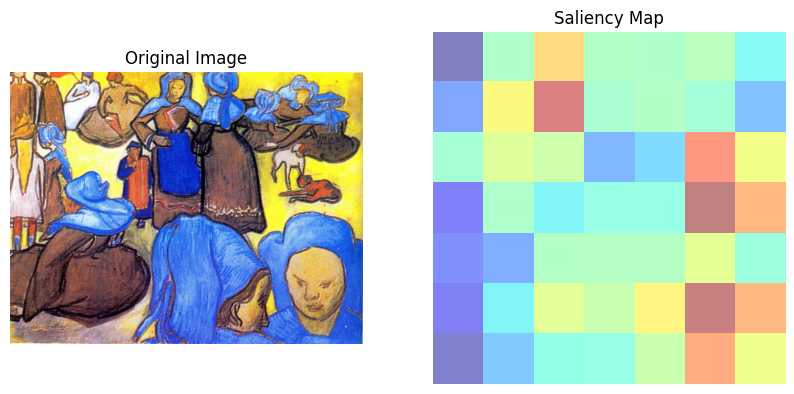

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define a function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = Image.open(img_path)
    img = img.convert('RGB')  # Ensure the image is in RGB format
    img = img.resize((224, 224))  # Resize the image to match the input size for ResNet50
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Load the ResNet50 model
model = tf.keras.applications.ResNet50(weights='imagenet')

# Load and preprocess the image from the file path
img_path = '/content/images/images/Vincent_van_Gogh/Vincent_van_Gogh_216.jpg'
img = load_and_preprocess_image(img_path)

# Define the layer from which you want to extract gradients
layer_name = 'conv5_block3_out'  # Choose the layer from which you want to extract the gradients

# Define the number of classes in your classification task
num_classes = 1000  # Number of classes in ImageNet

# Define a function to compute the gradient-weighted class activation map (Grad-CAM)
def grad_cam(model, img_array, layer_name, num_classes):
    grad_model = Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, np.argmax(predictions[0])]
    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]
    gate_f = tf.cast(output > 0, 'float32')
    gate_r = tf.cast(grads > 0, 'float32')
    guided_grads = gate_f * gate_r * grads
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, output), axis=-1)
    cam = np.maximum(cam, 0)  # Apply ReLU to remove negative values
    cam /= np.max(cam)  # Normalize to [0,1]
    return cam

# Generate the saliency map
saliency_map = grad_cam(model, img, layer_name, num_classes)

# Plot the original image and the saliency map
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Image.open(img_path))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(saliency_map, cmap='jet', alpha=0.5)
plt.title('Saliency Map')
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('path_to_your_trained_model')

# Load and preprocess the image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Assuming input size required by your model is 224x224
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Load artist data
artist_data = pd.DataFrame({
    'name': ['Vincent van Gogh', 'Edgar Degas', 'Pablo Picasso', 'Pierre-Auguste Renoir',
             'Albrecht Dürer', 'Paul Gauguin', 'Francisco Goya', 'Rembrandt',
             'Alfred Sisley', 'Titian', 'Marc Chagall'],
    'paintings': [877, 702, 439, 336, 328, 311, 291, 262, 259, 255, 239],
    'class_weight': [0.445631, 0.556721, 0.890246, 1.163149, 1.191519, 1.256650,
                     1.343018, 1.491672, 1.508951, 1.532620, 1.635223]
})

# Create a list of artist labels
artist_labels = artist_data['name'].tolist()

# Preprocess the image
image_path = '/content/images/images/Vincent_van_Gogh/Vincent_van_Gogh_295.jpg'
input_image = preprocess_image(image_path)

# Make predictions using your model
predictions = model.predict(input_image)

# Interpret predictions
# Assuming your model returns the probabilities for each artist or artistic style
# You can find the indices of the top 5 predicted classes
top5_indices = np.argsort(predictions, axis=1)[0][-5:]

# Print the top 5 predicted artists or artistic styles
print("Top 5 Predicted Artists or Artistic Styles:")
for index in reversed(top5_indices):
    probability = predictions[0][index]
    artist_or_style = artist_labels[index]
    print(f"{artist_or_style}: Probability {probability:.4f}")



OSError: No file or directory found at path_to_your_trained_model